<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/AI_WEEK_6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


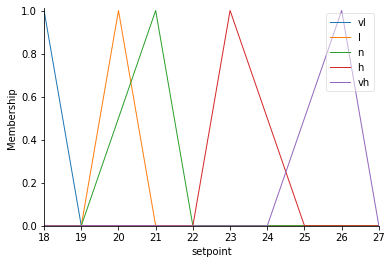

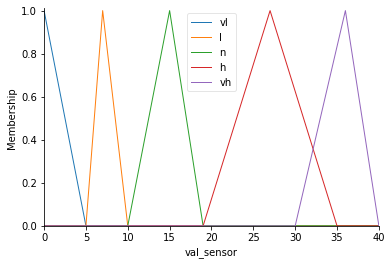

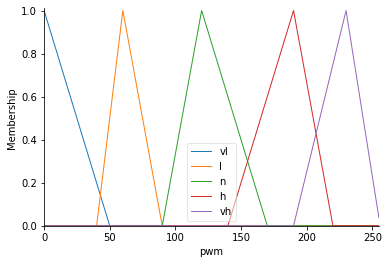

In [ ]:
# nhiệt độ 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,28,1), 'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,41,1), 'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

setpoint['vl'] = fuzz.trimf(setpoint.universe,[18,18,19])
setpoint['l'] = fuzz.trimf(setpoint.universe,[19,20,21])
setpoint['n'] = fuzz.trimf(setpoint.universe,[19,21,22])
setpoint['h'] = fuzz.trimf(setpoint.universe,[22,23,25])
setpoint['vh'] = fuzz.trimf(setpoint.universe,[24,26,27])

val_sensor['vl'] = fuzz.trimf(val_sensor.universe,[0,0,5])
val_sensor['l'] = fuzz.trimf(val_sensor.universe,[5,7,10])
val_sensor['n'] = fuzz.trimf(val_sensor.universe,[10,15,19])
val_sensor['h'] = fuzz.trimf(val_sensor.universe,[19,27,35])
val_sensor['vh'] = fuzz.trimf(val_sensor.universe,[30,36,40])

pwm['vl'] = fuzz.trimf(pwm.universe,[0,0,50])
pwm['l'] = fuzz.trimf(pwm.universe,[40,60,90])
pwm['n'] = fuzz.trimf(pwm.universe,[90,120,170])
pwm['h'] = fuzz.trimf(pwm.universe,[140,190,220])
pwm['vh'] = fuzz.trimf(pwm.universe,[190,230,256])


setpoint.view()
val_sensor.view()
pwm.view()





150.66676253475222


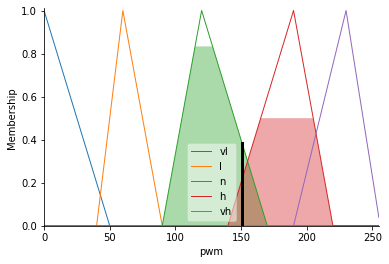

In [ ]:
rule1 = ctrl.Rule(setpoint['vl'] & val_sensor['vl'],pwm['vl'])
rule2 = ctrl.Rule(setpoint['l'] & val_sensor['vl'],pwm['l'])
rule3 = ctrl.Rule(setpoint['n'] & val_sensor['vl'],pwm['l'])
rule4 = ctrl.Rule(setpoint['h'] & val_sensor['vl'],pwm['n'])
rule5 = ctrl.Rule(setpoint['vh'] & val_sensor['vl'],pwm['h'])

rule6 = ctrl.Rule(setpoint['vl'] & val_sensor['l'],pwm['l'])
rule7 = ctrl.Rule(setpoint['l'] & val_sensor['l'],pwm['l'])
rule8 = ctrl.Rule(setpoint['n'] & val_sensor['l'],pwm['n'])
rule9 = ctrl.Rule(setpoint['h'] & val_sensor['l'],pwm['n'])
rule10 = ctrl.Rule(setpoint['vh'] & val_sensor['l'],pwm['h'])

rule11 = ctrl.Rule(setpoint['vl'] & val_sensor['n'],pwm['n'])
rule12 = ctrl.Rule(setpoint['l'] & val_sensor['n'],pwm['l'])
rule13 = ctrl.Rule(setpoint['n'] & val_sensor['n'],pwm['n'])
rule14 = ctrl.Rule(setpoint['h'] & val_sensor['n'],pwm['n'])
rule15 = ctrl.Rule(setpoint['vh'] & val_sensor['n'],pwm['vh'])

rule16 = ctrl.Rule(setpoint['vl'] & val_sensor['h'],pwm['n'])
rule17= ctrl.Rule(setpoint['l'] & val_sensor['h'],pwm['n'])
rule18 = ctrl.Rule(setpoint['n'] & val_sensor['h'],pwm['h'])
rule19= ctrl.Rule(setpoint['h'] & val_sensor['h'],pwm['vh'])
rule20= ctrl.Rule(setpoint['vh'] & val_sensor['h'],pwm['vh'])

rule21 = ctrl.Rule(setpoint['vl'] & val_sensor['vh'],pwm['n'])
rule22 = ctrl.Rule(setpoint['l'] & val_sensor['vh'],pwm['n'])
rule23 = ctrl.Rule(setpoint['n'] & val_sensor['vh'],pwm['h'])
rule24 = ctrl.Rule(setpoint['h'] & val_sensor['vh'],pwm['vh'])
rule25 = ctrl.Rule(setpoint['vh'] & val_sensor['vh'],pwm['vh'])


pwming_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint'] = 20
pwming.input['val_sensor'] = 35
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim = pwming)



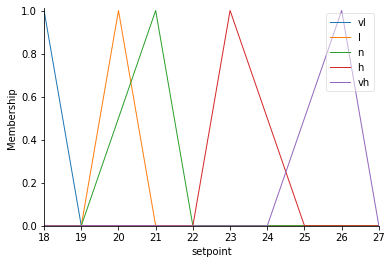

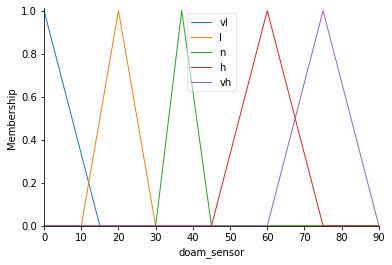

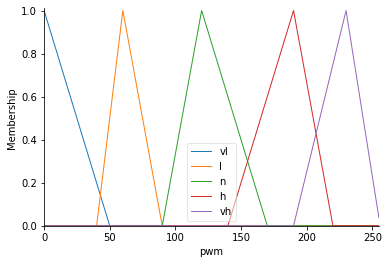

In [ ]:
# độ ẩm 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,28,1), 'setpoint')
doam_sensor = ctrl.Antecedent(np.arange(0,91,1), 'doam_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm') 

setpoint['vl'] = fuzz.trimf(setpoint.universe,[18,18,19])
setpoint['l'] = fuzz.trimf(setpoint.universe,[19,20,21])
setpoint['n'] = fuzz.trimf(setpoint.universe,[19,21,22])
setpoint['h'] = fuzz.trimf(setpoint.universe,[22,23,25])
setpoint['vh'] = fuzz.trimf(setpoint.universe,[24,26,27])

doam_sensor['vl'] = fuzz.trimf(doam_sensor.universe,[0,0,15])
doam_sensor['l'] = fuzz.trimf(doam_sensor.universe,[10,20,30])
doam_sensor['n'] = fuzz.trimf(doam_sensor.universe,[30,37,45])
doam_sensor['h'] = fuzz.trimf(doam_sensor.universe,[45,60,75])
doam_sensor['vh'] = fuzz.trimf(doam_sensor.universe,[60,75,90])

pwm['vl'] = fuzz.trimf(pwm.universe,[0,0,50])
pwm['l'] = fuzz.trimf(pwm.universe,[40,60,90])
pwm['n'] = fuzz.trimf(pwm.universe,[90,120,170])
pwm['h'] = fuzz.trimf(pwm.universe,[140,190,220])
pwm['vh'] = fuzz.trimf(pwm.universe,[190,230,256])


setpoint.view()
doam_sensor.view()
pwm.view()


128.44444444444446


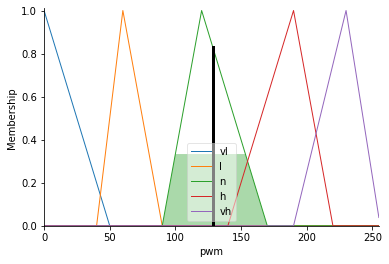

In [ ]:
rule1 = ctrl.Rule(setpoint['vl'] & doam_sensor['vl'],pwm['vl'])
rule2 = ctrl.Rule(setpoint['l'] & doam_sensor['vl'],pwm['l'])
rule3 = ctrl.Rule(setpoint['n'] & doam_sensor['vl'],pwm['l'])
rule4 = ctrl.Rule(setpoint['h'] & doam_sensor['vl'],pwm['n'])
rule5 = ctrl.Rule(setpoint['vh'] & doam_sensor['vl'],pwm['h'])

rule6 = ctrl.Rule(setpoint['vl'] & doam_sensor['l'],pwm['l'])
rule7 = ctrl.Rule(setpoint['l'] & doam_sensor['l'],pwm['l'])
rule8 = ctrl.Rule(setpoint['n'] & doam_sensor['l'],pwm['n'])
rule9 = ctrl.Rule(setpoint['h'] & doam_sensor['l'],pwm['n'])
rule10 = ctrl.Rule(setpoint['vh'] & doam_sensor['l'],pwm['h'])

rule11 = ctrl.Rule(setpoint['vl'] & doam_sensor['n'],pwm['n'])
rule12 = ctrl.Rule(setpoint['l'] & doam_sensor['n'],pwm['l'])
rule13 = ctrl.Rule(setpoint['n'] & doam_sensor['n'],pwm['n'])
rule14 = ctrl.Rule(setpoint['h'] & doam_sensor['n'],pwm['n'])
rule15 = ctrl.Rule(setpoint['vh'] & doam_sensor['n'],pwm['vh'])

rule16 = ctrl.Rule(setpoint['vl'] & doam_sensor['h'],pwm['n'])
rule17= ctrl.Rule(setpoint['l'] & doam_sensor['h'],pwm['n'])
rule18 = ctrl.Rule(setpoint['n'] & doam_sensor['h'],pwm['h'])
rule19= ctrl.Rule(setpoint['h'] & doam_sensor['h'],pwm['vh'])
rule20= ctrl.Rule(setpoint['vh'] & doam_sensor['h'],pwm['vh'])

rule21 = ctrl.Rule(setpoint['vl'] & doam_sensor['vh'],pwm['n'])
rule22 = ctrl.Rule(setpoint['l'] & doam_sensor['vh'],pwm['n'])
rule23 = ctrl.Rule(setpoint['n'] & doam_sensor['vh'],pwm['h'])
rule24 = ctrl.Rule(setpoint['h'] & doam_sensor['vh'],pwm['vh'])
rule25 = ctrl.Rule(setpoint['vh'] & doam_sensor['vh'],pwm['vh'])


pwming_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint'] = 15
pwming.input['doam_sensor'] = 50
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim = pwming)

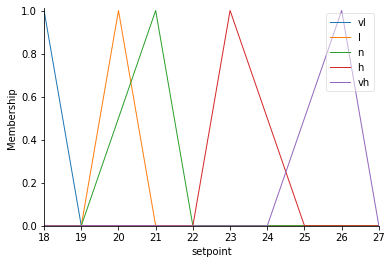

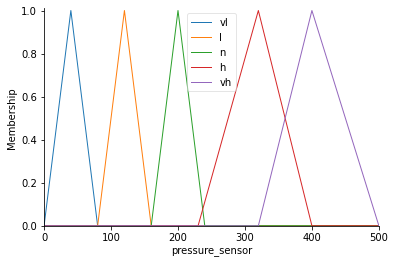

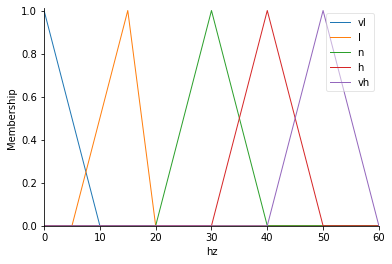

In [ ]:
# áp suất
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,28,1), 'setpoint')
pressure_sensor = ctrl.Antecedent(np.arange(0,501,1), 'pressure_sensor')
hz = ctrl.Consequent(np.arange(0,61,1),'hz') 

setpoint['vl'] = fuzz.trimf(setpoint.universe,[18,18,19])
setpoint['l'] = fuzz.trimf(setpoint.universe,[19,20,21])
setpoint['n'] = fuzz.trimf(setpoint.universe,[19,21,22])
setpoint['h'] = fuzz.trimf(setpoint.universe,[22,23,25])
setpoint['vh'] = fuzz.trimf(setpoint.universe,[24,26,27])

pressure_sensor['vl'] = fuzz.trimf(pressure_sensor.universe,[0,40,80])
pressure_sensor['l'] = fuzz.trimf(pressure_sensor.universe,[80,120,160])
pressure_sensor['n'] = fuzz.trimf(pressure_sensor.universe,[160,200,240])
pressure_sensor['h'] = fuzz.trimf(pressure_sensor.universe,[230,320,400])
pressure_sensor['vh'] = fuzz.trimf(pressure_sensor.universe,[320,400,500])

hz['vl'] = fuzz.trimf(hz.universe,[0,0,10])
hz['l'] = fuzz.trimf(hz.universe,[5,15,20])
hz['n'] = fuzz.trimf(hz.universe,[20,30,40])
hz['h'] = fuzz.trimf(hz.universe,[30,40,50])
hz['vh'] = fuzz.trimf(hz.universe,[40,50,60])


setpoint.view()
pressure_sensor.view()
hz.view()


13.250000000000002


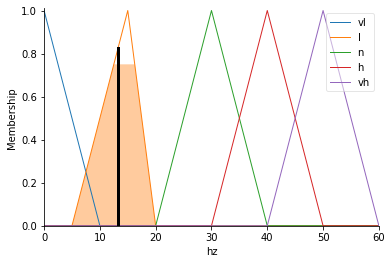

In [ ]:
rule1 = ctrl.Rule(setpoint['vl'] & pressure_sensor['vl'],hz['l'])
rule2 = ctrl.Rule(setpoint['l'] & pressure_sensor['vl'],hz['vl'])
rule3 = ctrl.Rule(setpoint['n'] & pressure_sensor['vl'],hz['n'])
rule4 = ctrl.Rule(setpoint['h'] & pressure_sensor['vl'],hz['h'])
rule5 = ctrl.Rule(setpoint['vh'] & pressure_sensor['vl'],hz['h'])

rule6 = ctrl.Rule(setpoint['vl'] & pressure_sensor['l'],hz['l'])
rule7 = ctrl.Rule(setpoint['l'] & pressure_sensor['l'],hz['vl'])
rule8 = ctrl.Rule(setpoint['n'] & pressure_sensor['l'],hz['l'])
rule9 = ctrl.Rule(setpoint['h'] & pressure_sensor['l'],hz['n'])
rule10 = ctrl.Rule(setpoint['vh'] & pressure_sensor['l'],hz['vh'])

rule11 = ctrl.Rule(setpoint['vl'] & pressure_sensor['n'],hz['l'])
rule12 = ctrl.Rule(setpoint['l'] & pressure_sensor['n'],hz['n'])
rule13 = ctrl.Rule(setpoint['n'] & pressure_sensor['n'],hz['n'])
rule14 = ctrl.Rule(setpoint['h'] & pressure_sensor['n'],hz['h'])
rule15 = ctrl.Rule(setpoint['vh'] & pressure_sensor['n'],hz['vh'])

rule16 = ctrl.Rule(setpoint['vl'] & pressure_sensor['h'],hz['n'])
rule17= ctrl.Rule(setpoint['l'] & pressure_sensor['h'],hz['n'])
rule18 = ctrl.Rule(setpoint['n'] & pressure_sensor['h'],hz['h'])
rule19= ctrl.Rule(setpoint['h'] & pressure_sensor['h'],hz['vh'])
rule20= ctrl.Rule(setpoint['vh'] & pressure_sensor['h'],hz['vh'])

rule21 = ctrl.Rule(setpoint['vl'] & pressure_sensor['vh'],hz['n'])
rule22 = ctrl.Rule(setpoint['l'] & pressure_sensor['vh'],hz['n'])
rule23 = ctrl.Rule(setpoint['n'] & pressure_sensor['vh'],hz['h'])
rule24 = ctrl.Rule(setpoint['h'] & pressure_sensor['vh'],hz['vh'])
rule25 = ctrl.Rule(setpoint['vh'] & pressure_sensor['vh'],hz['vh'])


hzing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
hzing = ctrl.ControlSystemSimulation(hzing_ctrl)
hzing.input['setpoint'] = 15
hzing.input['pressure_sensor'] = 30
hzing.compute()
print(hzing.output['hz'])
hz.view(sim = hzing)

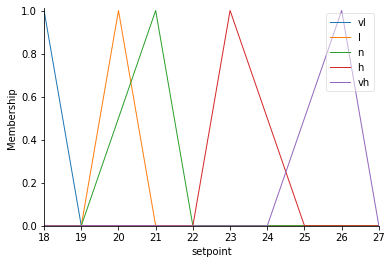

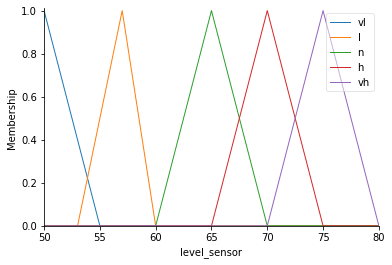

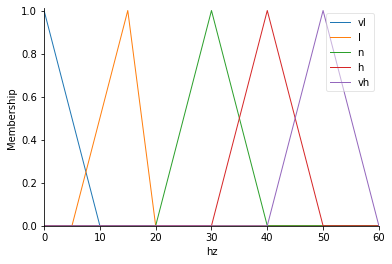

In [ ]:
#mức 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,28,1), 'setpoint')
level_sensor = ctrl.Antecedent(np.arange(50,81,1), 'level_sensor')
hz = ctrl.Consequent(np.arange(0,61,1),'hz') 

setpoint['vl'] = fuzz.trimf(setpoint.universe,[18,18,19])
setpoint['l'] = fuzz.trimf(setpoint.universe,[19,20,21])
setpoint['n'] = fuzz.trimf(setpoint.universe,[19,21,22])
setpoint['h'] = fuzz.trimf(setpoint.universe,[22,23,25])
setpoint['vh'] = fuzz.trimf(setpoint.universe,[24,26,27])

level_sensor['vl'] = fuzz.trimf(level_sensor.universe,[50,50,55])
level_sensor['l'] = fuzz.trimf(level_sensor.universe,[53,57,60])
level_sensor['n'] = fuzz.trimf(level_sensor.universe,[60,65,70])
level_sensor['h'] = fuzz.trimf(level_sensor.universe,[65,70,75])
level_sensor['vh'] = fuzz.trimf(level_sensor.universe,[70,75,80])

hz['vl'] = fuzz.trimf(hz.universe,[0,0,10])
hz['l'] = fuzz.trimf(hz.universe,[5,15,20])
hz['n'] = fuzz.trimf(hz.universe,[20,30,40])
hz['h'] = fuzz.trimf(hz.universe,[30,40,50])
hz['vh'] = fuzz.trimf(hz.universe,[40,50,60])


setpoint.view()
level_sensor.view()
hz.view()

13.333333333333332


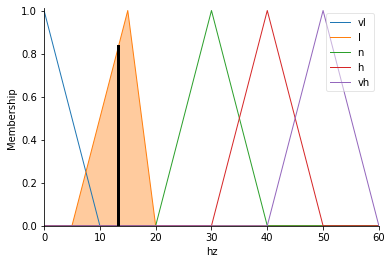

In [ ]:
rule1 = ctrl.Rule(setpoint['vl'] & level_sensor['vl'],hz['l'])
rule2 = ctrl.Rule(setpoint['l'] & level_sensor['vl'],hz['vl'])
rule3 = ctrl.Rule(setpoint['n'] & level_sensor['vl'],hz['n'])
rule4 = ctrl.Rule(setpoint['h'] & level_sensor['vl'],hz['h'])
rule5 = ctrl.Rule(setpoint['vh'] & level_sensor['vl'],hz['h'])

rule6 = ctrl.Rule(setpoint['vl'] & level_sensor['l'],hz['l'])
rule7 = ctrl.Rule(setpoint['l'] & level_sensor['l'],hz['vl'])
rule8 = ctrl.Rule(setpoint['n'] & level_sensor['l'],hz['l'])
rule9 = ctrl.Rule(setpoint['h'] & level_sensor['l'],hz['n'])
rule10 = ctrl.Rule(setpoint['vh'] & level_sensor['l'],hz['vh'])

rule11 = ctrl.Rule(setpoint['vl'] & level_sensor['n'],hz['l'])
rule12 = ctrl.Rule(setpoint['l'] & level_sensor['n'],hz['n'])
rule13 = ctrl.Rule(setpoint['n'] & level_sensor['n'],hz['n'])
rule14 = ctrl.Rule(setpoint['h'] & level_sensor['n'],hz['h'])
rule15 = ctrl.Rule(setpoint['vh'] & level_sensor['n'],hz['vh'])

rule16 = ctrl.Rule(setpoint['vl'] & level_sensor['h'],hz['n'])
rule17= ctrl.Rule(setpoint['l'] & level_sensor['h'],hz['l'])
rule18 = ctrl.Rule(setpoint['n'] & level_sensor['h'],hz['n'])
rule19= ctrl.Rule(setpoint['h'] & level_sensor['h'],hz['vh'])
rule20= ctrl.Rule(setpoint['vh'] & level_sensor['h'],hz['vh'])

rule21 = ctrl.Rule(setpoint['vl'] & level_sensor['vh'],hz['n'])
rule22 = ctrl.Rule(setpoint['l'] & level_sensor['vh'],hz['n'])
rule23 = ctrl.Rule(setpoint['n'] & level_sensor['vh'],hz['n'])
rule24 = ctrl.Rule(setpoint['h'] & level_sensor['vh'],hz['h'])
rule25 = ctrl.Rule(setpoint['vh'] & level_sensor['vh'],hz['vh'])


hzing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
hzing = ctrl.ControlSystemSimulation(hzing_ctrl)
hzing.input['setpoint'] = 10
hzing.input['level_sensor'] = 10
hzing.compute()
print(hzing.output['hz'])
hz.view(sim= hzing)